# I. Pen and Paper

### 1.

In [3]:
import numpy as np

y1 = np.array([1, 1, 3, 3, 2])
y2 = np.array([1, 3, 2, 3, 4])
ynum = np.array([1.25, 7.0, 2.7, 3.2, 5.5])

phi = y1 * y2

phi_with_bias = np.vstack([np.ones_like(phi), phi]).T

X = phi_with_bias
y = ynum
beta = np.linalg.pinv(X.T @ X) @ X.T @ y

print(np.around(beta, 5))

[3.31593 0.11372]


### 2.

In [4]:
import numpy as np

y1 = np.array([1, 1, 3, 3, 2])
y2 = np.array([1, 3, 2, 3, 4])
ynum = np.array([1.25, 7.0, 2.7, 3.2, 5.5])
lambda_ridge = 1

phi = y1 * y2

phi_with_bias = np.vstack([np.ones_like(phi), phi]).T

I = np.eye(X.shape[1])

X = phi_with_bias
y = ynum
beta = np.linalg.pinv(X.T @ X + lambda_ridge * I) @ X.T @ y

print(np.around(beta, 5))

[1.81809 0.32376]


# II. Programming and critical analysis

### 5. 

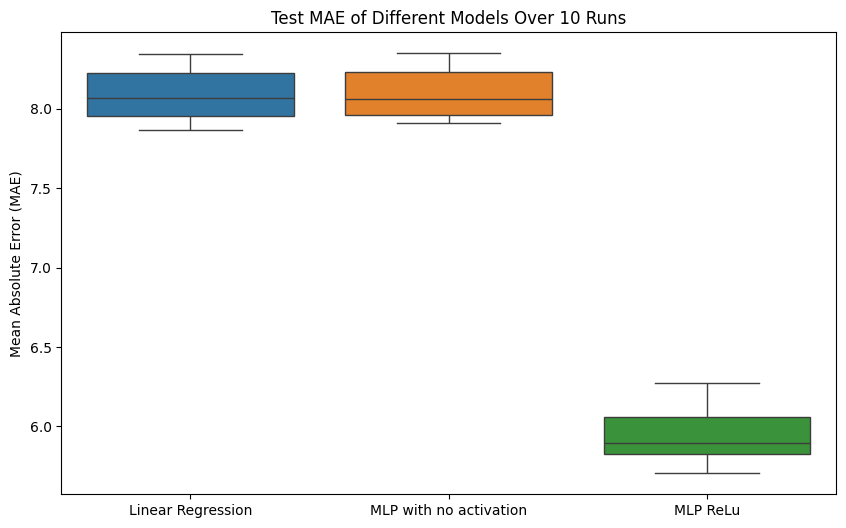

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('parkinsons.csv')
X = df.drop('target', axis=1)
y = df['target']

MAE_linear = []
MAE_MLP = []
MAE_relu = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)

    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_pred = linear.predict(X_test)
    MAE_linear.append(mean_absolute_error(y_test, y_pred))

    MLP = MLPRegressor(hidden_layer_sizes=(10,10), activation='identity', random_state=0)
    MLP.fit(X_train, y_train)
    y_pred = MLP.predict(X_test)
    MAE_MLP.append(mean_absolute_error(y_test, y_pred))

    MLP_relu = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', random_state=0)
    MLP_relu.fit(X_train, y_train)
    y_pred = MLP_relu.predict(X_test)
    MAE_relu.append(mean_absolute_error(y_test, y_pred))

MAE_data = pd.DataFrame({
    'Linear Regression': MAE_linear,
    'MLP with no activation': MAE_MLP,
    'MLP ReLu': MAE_relu
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=MAE_data)
plt.title('Test MAE of Different Models Over 10 Runs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


### 7.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   4.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   4.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   4.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   4.6s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   4.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   4.6s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.2s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   3.1s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   3.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   1.6s
[CV] END alpha=0.0001, batch_siz

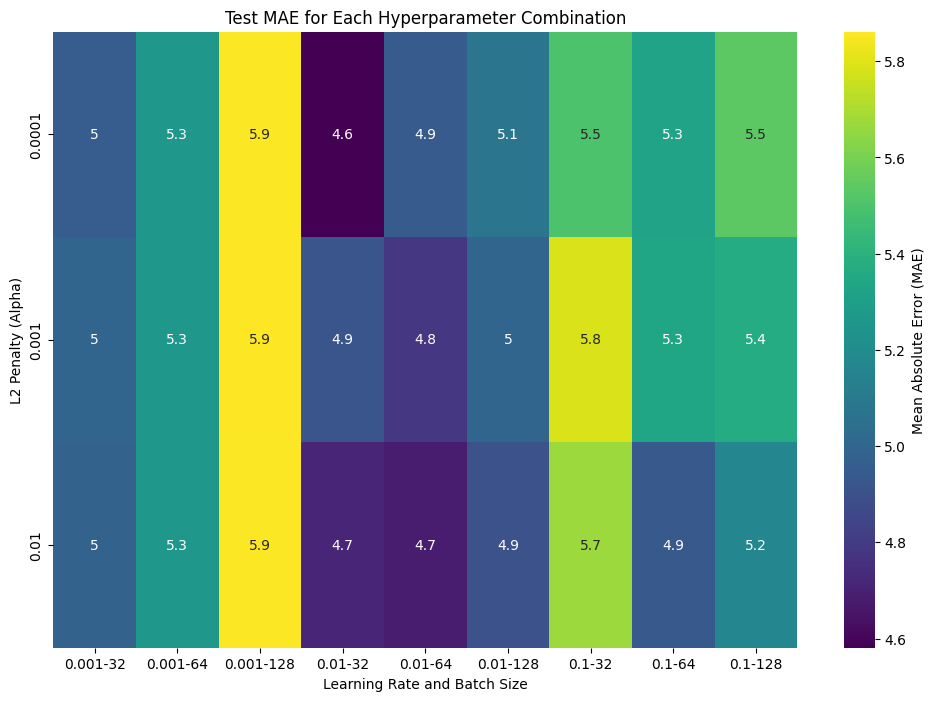

Best Parameters:  {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
Best Test MAE: 4.58105


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('parkinsons.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

MLP = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0)

parameters = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

grid_search = GridSearchCV(MLP, parameters, scoring='neg_mean_absolute_error', verbose=2, cv=5)

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

results['MAE'] = -results['mean_test_score']

pivot_table = results.pivot_table(
    values='MAE',
    index='param_alpha',
    columns=['param_learning_rate_init', 'param_batch_size'],
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Absolute Error (MAE)'})
plt.title('Test MAE for Each Hyperparameter Combination')
plt.xlabel('Learning Rate and Batch Size')
plt.ylabel('L2 Penalty (Alpha)')
plt.show()

best_params = grid_search.best_params_
print("Best Parameters: ", best_params)
best_mae = -grid_search.best_score_
print("Best Test MAE: {:.5f}".format(best_mae))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   9.2s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   7.7s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=   9.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  11.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  13.2s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   5.0s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.6s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   2.7s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   3.8s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   4.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   2.4s
[CV] END alpha=0.0001, batch_siz

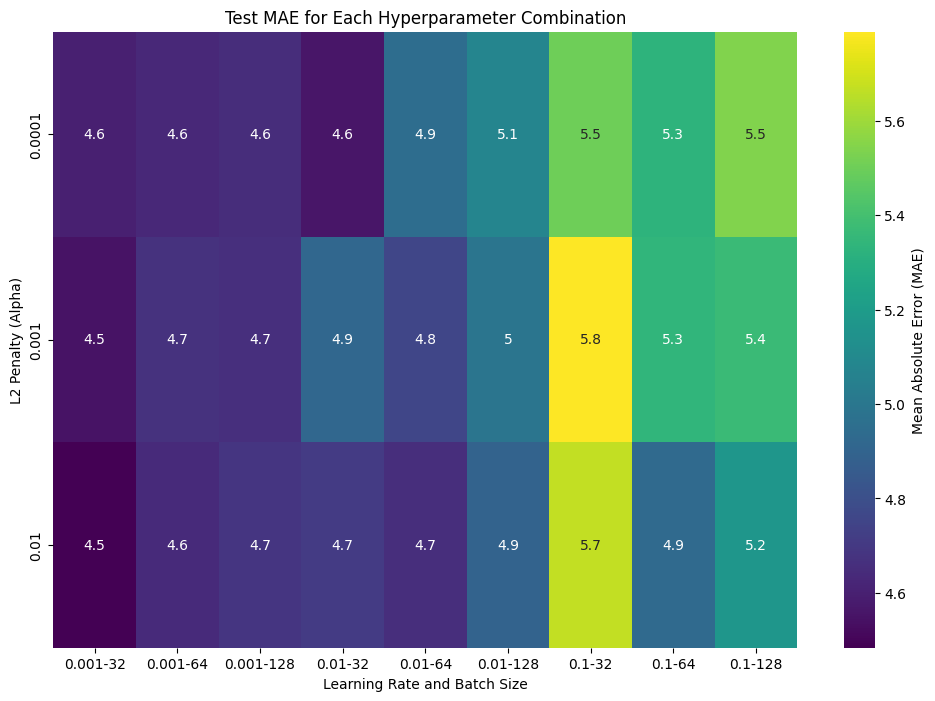

Best Parameters:  {'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.001}
Best Test MAE: 4.48387


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('parkinsons.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

MLP = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

parameters = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

grid_search = GridSearchCV(MLP, parameters, scoring='neg_mean_absolute_error', verbose=2, cv=5)

grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

results['MAE'] = -results['mean_test_score']

pivot_table = results.pivot_table(
    values='MAE',
    index='param_alpha',
    columns=['param_learning_rate_init', 'param_batch_size'],
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Absolute Error (MAE)'})
plt.title('Test MAE for Each Hyperparameter Combination')
plt.xlabel('Learning Rate and Batch Size')
plt.ylabel('L2 Penalty (Alpha)')
plt.show()

best_params = grid_search.best_params_
print("Best Parameters: ", best_params)
best_mae = -grid_search.best_score_
print("Best Test MAE: {:.5f}".format(best_mae))
